
    TimeNumber of seconds elapsed between this transaction and the first transaction in the dataset
    V1may be result of a PCA Dimensionality reduction to protect user identities and sensitive features(v1-v28)
    V2
    V3
    V4
    V5
    V6
    V7
    V8
    V9
    V10
    V11
    V12
    V13
    V14
    V15
    V16
    V17
    V18
    V19
    V20
    V21
    V22
    V23
    V24
    V25
    V26
    V27
    V28abc
    AmountTransaction amount
    Class1 for fraudulent transactions, 0 otherwise

In [1]:
# import all required library

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# read dataset file

df = pd.read_csv('datasets/creditcard.csv')
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# you can check the size of the file 

import os
file_name = ('datasets/creditcard.csv')
file_stats = os.stat(file_name)
# print('File size in bytes is =',file_stats.st_size)

print('File Size in MB or megabyte is ={:.2f}'.format(file_stats.st_size/(1024*1024)),'MB')

File Size in MB or megabyte is =143.84 MB


In [4]:
# check the number of columns and row of the file 

df.shape

# Dataset contain 284807 row and 31 columns

(284807, 31)

In [5]:
# Lets check the number if Fraud and Normal Transaction

fraud = df.loc[df['Class']==1]
print('fraud transaction =',len(fraud))
normal = df.loc[df['Class']==0]
print('normal transaction =',len(normal))

fraud transaction = 492
normal transaction = 284315


In [6]:
df.columns

Index(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10',
       'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20',
       'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount',
       'Class'],
      dtype='object')

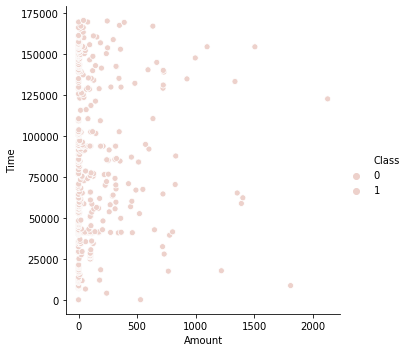

In [7]:
sns.relplot(data=fraud, x='Amount' ,y='Time', hue='Class' );

df.columns

In [18]:
# Lets split dependent and independent variable

x = df.iloc[:,:-1]
print(x.shape)
y = df.iloc[:,-1]

(284807, 30)


In [19]:
# Create Logistic Regression Model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import train_test_split

In [30]:
# split the training and testing data

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.35)

# print(x_train.shape,y_train.shape,x_test.shape,y_test.shape)
lr = LogisticRegression().fit(x_train, y_train)

# print(lr.score(x_test , y_test))

y_test_pred = lr.predict(x_test)

print(y_test_pred)
print(y_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


[0 0 0 ... 0 0 0]
128024    0
249403    0
278041    0
116305    0
39764     0
         ..
79104     0
113746    0
97480     0
185478    0
41752     0
Name: Class, Length: 99683, dtype: int64


In [12]:
# it gives 99% accuracy >>>> its very good

In [13]:
print(classification_report(y_test, y_test_pred))
print(accuracy_score(y_test, y_test_pred))
print(confusion_matrix(y_test, y_test_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     99520
           1       0.83      0.59      0.69       163

    accuracy                           1.00     99683
   macro avg       0.92      0.79      0.85     99683
weighted avg       1.00      1.00      1.00     99683

0.9991372651304635
[[99501    19]
 [   67    96]]


In [14]:
# Lets test our model by giving some inputs and check wether it give true result or not
# pick some random independent value from dataset and check the dependent variable value and compare it with output

x = np.array([1,-1.35835406159823,-1.34016307473609,1.77320934263119,0.379779593034328,-0.503198133318193,1.80049938079263,0.791460956450422,0.247675786588991,-1.51465432260583,0.207642865216696,0.624501459424895,0.066083685268831,0.717292731410831,-0.165945922763554,2.34586494901581,-2.89008319444231,1.10996937869599,-0.121359313195888,-2.26185709530414,0.524979725224404,0.247998153469754,0.771679401917229,0.909412262347719,-0.689280956490685,-0.327641833735251,-0.139096571514147,-0.0553527940384261,-0.0597518405929204,378.66]).reshape(1,30)
x1 = np.array([406,-2.3122265423263,1.95199201064158,-1.60985073229769,3.9979055875468,-0.522187864667764,-1.42654531920595,-2.53738730624579,1.39165724829804,-2.77008927719433,-2.77227214465915,3.20203320709635,-2.89990738849473,-0.595221881324605,-4.28925378244217,0.389724120274487,-1.14074717980657,-2.83005567450437,-0.0168224681808257,0.416955705037907,0.126910559061474,0.517232370861764,-0.0350493686052974,-0.465211076182388,0.320198198514526,0.0445191674731724,0.177839798284401,0.261145002567677,-0.143275874698919,0]).reshape(1,30)

print('actual-->0','Predicted-->',lr.predict(x))
print('actual-->1','Predicted-->',lr.predict(x1))

actual-->0 Predicted--> [0]
actual-->1 Predicted--> [1]


In [15]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1
